# AR Model

**Videos:** https://youtu.be/JCKMV0Cuk0k

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
register_matplotlib_converters()
from time import time

## Ice Cream Production Data

`datetime.strptime`:https://www.programiz.com/python-programming/datetime/strptime

In [3]:
def parser(s):
    # String to datetime object
    return datetime.strptime(s, '%Y-%m-%d')

In [84]:
# read data
production_ice_cream=pd.read_csv('ice_cream.csv',parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
production_ice_cream.head()
print(production_ice_cream.index)

DatetimeIndex(['1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01',
               '1972-05-01', '1972-06-01', '1972-07-01', '1972-08-01',
               '1972-09-01', '1972-10-01',
               ...
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', name='DATE', length=577, freq=None)


/var/folders/vp/8_rd4_c56g3dpqb1167z6tqr0000gn/T/ipykernel_2270/3812209009.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  production_ice_cream=pd.read_csv('ice_cream.csv',parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [5]:
production_ice_cream.rename('production',inplace=True)

DATE
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Name: production, Length: 577, dtype: float64

In [6]:
#infer the frequency of the data
print(pd.infer_freq(production_ice_cream.index))
production_ice_cream = production_ice_cream.asfreq(pd.infer_freq(production_ice_cream.index))
production_ice_cream.head()

MS


DATE
1972-01-01    59.9622
1972-02-01    67.0605
1972-03-01    74.2350
1972-04-01    78.1120
1972-05-01    84.7636
Freq: MS, Name: production, dtype: float64

In [7]:
# just get data from 2010 onwards
start_date=pd.to_datetime("2010-01-01")
production_ice_cream=production_ice_cream[start_date:]

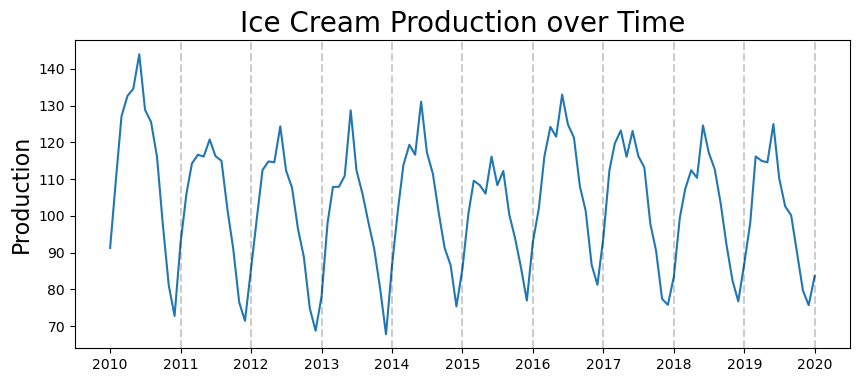

In [8]:
plt.figure(figsize=(10,4))
plt.plot(production_ice_cream)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [10]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(production_ice_cream,autolag='AIC')
print(result)
print(f' ADF Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'n_lags: {result[2]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'{key},{value}')

(-3.4692068038611237, 0.008814055324487575, 13, 107, {'1%': -3.492995948509562, '5%': -2.888954648057252, '10%': -2.58139291903223}, 623.0126017548498)
 ADF Statistics: -3.4692068038611237
p-value: 0.008814055324487575
n_lags: 13
Critical Values:
1%,-3.492995948509562
Critical Values:
5%,-2.888954648057252
Critical Values:
10%,-2.58139291903223


## ACF Plot

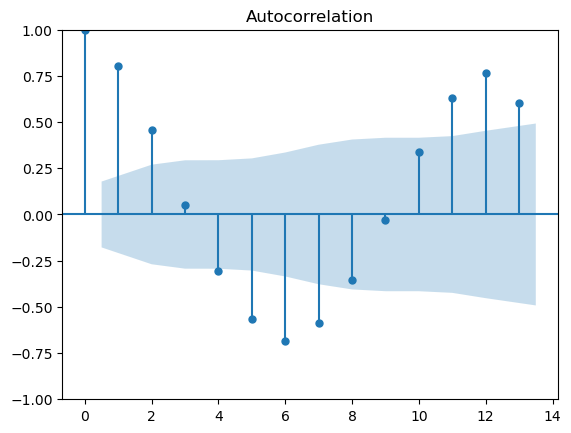

In [11]:
acf_plot=plot_acf(production_ice_cream,lags=13)

Based on decaying ACF, we are likely dealing with an Auto Regressive process

## PACF

/Users/yujiewang/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


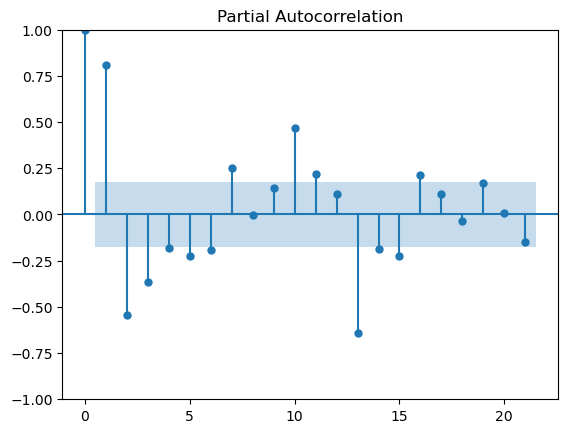

In [31]:
pacf_plot=plot_pacf(production_ice_cream)

Based on the pacf, we should start Auto Regressive model with lags 1,2,3

## Getting training and testing sets

In [12]:
train_end=datetime(2016,12,1)
test_end=datetime(2019,12,1)

train_data=production_ice_cream[:train_end]
test_data=production_ice_cream[train_end+timedelta(days=1):test_end]
print(train_data)
print(test_data)

DATE
2010-01-01     91.2895
2010-02-01    110.4994
2010-03-01    127.0971
2010-04-01    132.6468
2010-05-01    134.5576
                ...   
2016-08-01    121.3321
2016-09-01    108.0359
2016-10-01    101.3836
2016-11-01     86.6647
2016-12-01     81.2569
Freq: MS, Name: production, Length: 84, dtype: float64
DATE
2017-01-01     94.2454
2017-02-01    112.3879
2017-03-01    119.6982
2017-04-01    123.2282
2017-05-01    116.0635
2017-06-01    123.0870
2017-07-01    116.2639
2017-08-01    113.1717
2017-09-01     97.9125
2017-10-01     90.4732
2017-11-01     77.4378
2017-12-01     75.8118
2018-01-01     83.4343
2018-02-01     99.4899
2018-03-01    107.3152
2018-04-01    112.4309
2018-05-01    110.3544
2018-06-01    124.5841
2018-07-01    117.2215
2018-08-01    112.6779
2018-09-01    103.3118
2018-10-01     92.1321
2018-11-01     82.4347
2018-12-01     76.7608
2019-01-01     86.9988
2019-02-01     98.1116
2019-03-01    116.1718
2019-04-01    114.9703
2019-05-01    114.5613
2019-06-01    1

## Fit the AR Model

In [54]:
# create the model
# start with a lag three AR Model
model=AutoReg(train_data,lags=7)

In [55]:
# fit the model
start=time()
model_fit=model.fit()
end=time()
print("Model Fitting Time:", end-start)

Model Fitting Time: 0.000843048095703125


The table down tells you the importance of each lag that you choose to include in your model. The first column are the constants which are the coefficients.
And **P|z|** is the **p-value**, usually, we expect that the p-value is less than 0.05, if p-value is greater than 0.05, we say that the corresponding lag is not important.

So if I'm going up to AR3 model, I want to build the model with lag 1 and lag 3. Excluding lag 2 because it's not significant.

In [56]:
# summary of the model
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:             production   No. Observations:                   84
Model:                     AutoReg(7)   Log Likelihood                -254.754
Method:               Conditional MLE   S.D. of innovations              6.616
Date:                Fri, 21 Apr 2023   AIC                            527.508
Time:                        18:50:03   BIC                            548.602
Sample:                    08-01-2010   HQIC                           535.945
                         - 12-01-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            55.6330     13.347      4.168      0.000      29.474      81.792
production.L1     0.9194      0.108      8.500      0.000       0.707       1.131
production.L2    -0.0959      0.132     

In [57]:
# get prediction start and end dates
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [58]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals=test_data-predictions

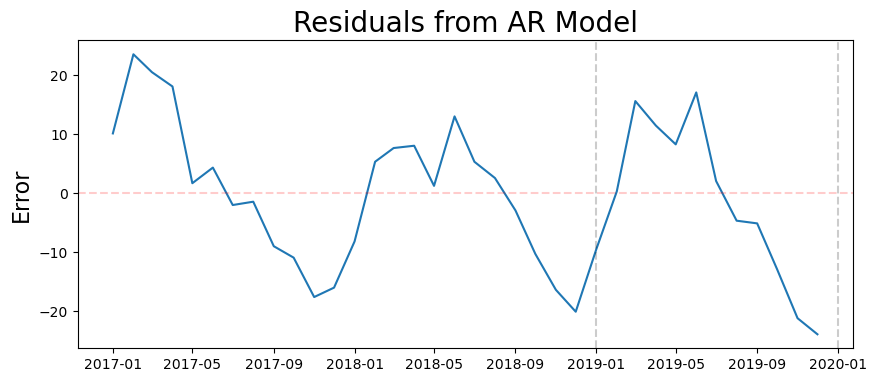

In [59]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0,color='r',linestyle='--',alpha=0.2)
for year in range(2019,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

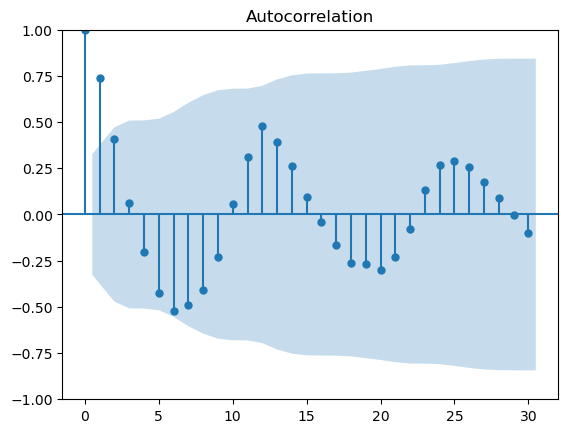

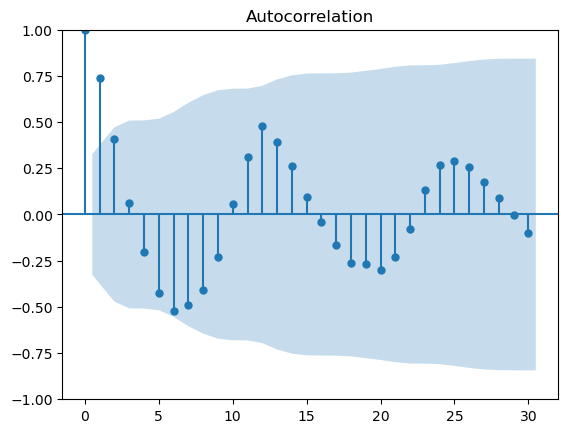

In [60]:
plot_acf(residuals,lags=30)

**Residuals:** https://otexts.com/fpp2/residuals.html
Question: What is relationship between the Residual and White Noise

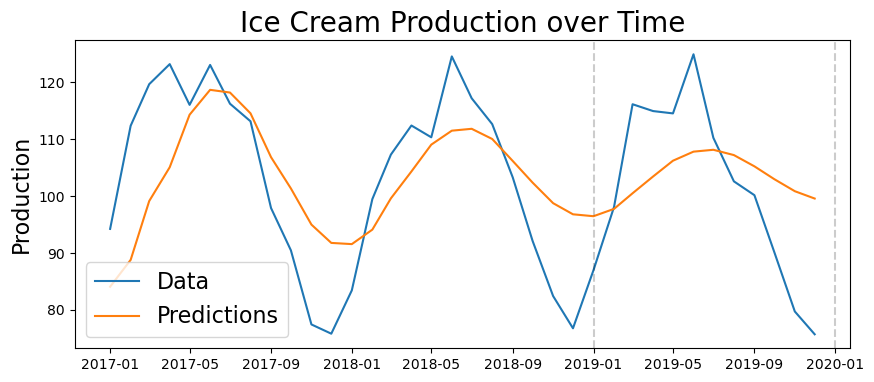

In [61]:
# draw the prediction plot
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data','Predictions'), fontsize=16)
plt.title("Ice Cream Production over Time", fontsize=20)
plt.ylabel('Production',fontsize=16)
for year in range(2019,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k', linestyle='--', alpha=0.2)

In [62]:
print('Mean Absolute Percent Error:',round(np.mean(abs(residuals/test_data)),4))
print('Root Mean Squared Error:',np.sqrt(np.mean(residuals**2)))

Mean Absolute Percent Error: 0.1067
Root Mean Squared Error: 12.332633677073193


**Mean Absolute Percent Error**: On average how what percent away are we from our actual target and we see that using an AR 3 model we're about twelve percent away on average so not great but not terrible.

We can try to tweak the numbers of lags, replace the **3** lags with **7** lags, but more or less nothing has changed drastically. We got a little bit help but not a lot.

It's not worth in this case to tweak the numbers of lags.


## Rolling Forecast Origin

Idea: Predict one month in advance each time


In [78]:
# create the model
# It is similar to the cross-validation, but the in order
predictions_rolling=pd.Series()
for end_date in test_data.index:
    train_data=production_ice_cream[:end_date-timedelta(days=1)]
    model=AutoReg(train_data,lags=3)
    model_fit=model.fit()
    pred=model_fit.predict(end_date-timedelta(days=1),end_date)
    predictions_rolling.loc[end_date]=pred.loc[end_date]


/var/folders/vp/8_rd4_c56g3dpqb1167z6tqr0000gn/T/ipykernel_2270/2871657308.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  predictions_rolling=pd.Series()


In [79]:
residuals_rolling=test_data-predictions_rolling # get the residuals

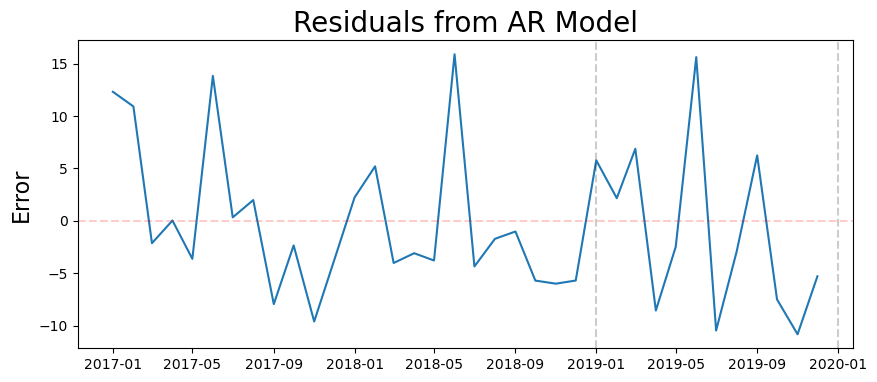

In [80]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0,color='r',linestyle='--',alpha=0.2)
for year in range(2019,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

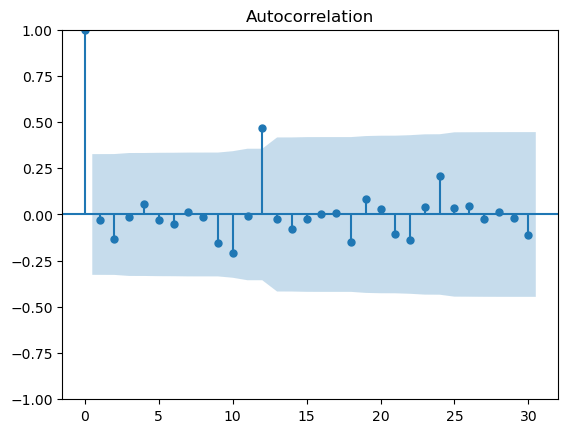

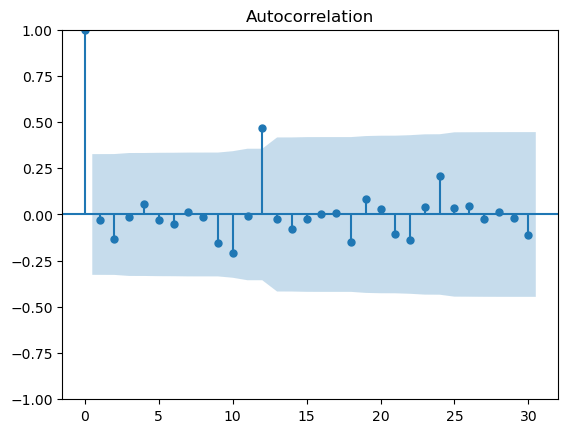

In [81]:
plot_acf(residuals_rolling,lags=30)

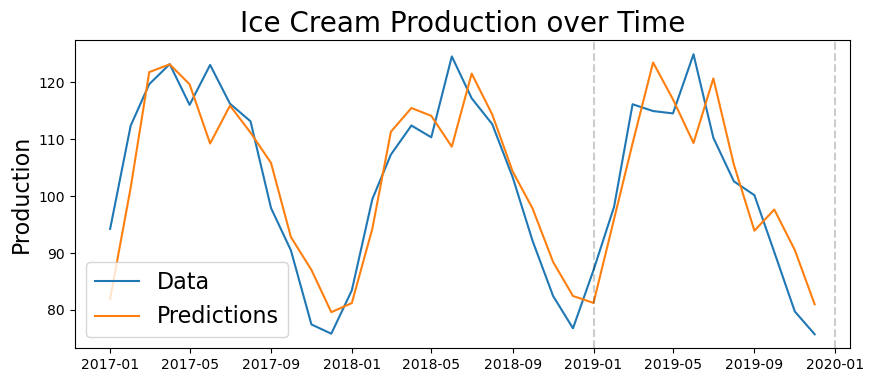

In [82]:
# draw the prediction plot
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions_rolling)

plt.legend(('Data','Predictions'), fontsize=16)
plt.title("Ice Cream Production over Time", fontsize=20)
plt.ylabel('Production',fontsize=16)
for year in range(2019,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k', linestyle='--', alpha=0.2)

In [83]:
print('Mean Absolute Percent Error:',round(np.mean(abs(residuals_rolling/test_data)),4))
print('Root Mean Squared Error:',np.sqrt(np.mean(residuals_rolling**2)))

Mean Absolute Percent Error: 0.0586
Root Mean Squared Error: 7.209130434100585
